# Redwine Regression

## Import packages

In [157]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [158]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [13, 10]
plt.rcParams['figure.figsize'] = [7, 5]

## Load data & explore data

In [159]:
!wget -N https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv

--2024-09-18 16:00:46--  https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7 [following]
--2024-09-18 16:00:47--  https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc77fdcb7da292aa6c58382bf011.dl.dropboxusercontent.com/cd/0/inline/Ca1aupKV4EwR6SNPkEOw_t1rToCa_-FfHKQPhdBWYh-tkmQTplOu9utah592O-bngi1XP0Zo8F14j86cYQcfGpt1KVCco7_4SaF2dxMWEFo51IZdc7bNmXLWE1dqjUaeeR8/file# [following]
--2024-09-18 16:00:49--  https://uc77fdcb7da292aa6c58382bf011.dl.dropboxusercontent.com/cd/0/inline

In [160]:
#column_names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
bos1 = pd.read_csv('winequality_red.csv', delimiter=';')

In [161]:
# data frame with first 5 rows (by default)
bos1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [162]:
# dimension
bos1.shape

(1599, 12)

In [163]:
pd.set_option("display.precision", 2)
bos1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


In [164]:
# correlation
pd.set_option("display.precision", 2)
bos1.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-2.56e-01,0.67,1.15e-01,9.37e-02,-1.54e-01,-0.11,0.67,-0.68,1.83e-01,-0.06,0.12
volatile acidity,-0.26,1.00e+00,-0.55,1.92e-03,6.13e-02,-1.05e-02,0.08,0.02,0.23,-2.61e-01,-0.20,-0.39
citric acid,0.67,-5.52e-01,1.00,1.44e-01,2.04e-01,-6.10e-02,0.04,0.36,-0.54,3.13e-01,0.11,0.23
residual sugar,0.11,1.92e-03,0.14,1.00e+00,5.56e-02,1.87e-01,0.20,0.36,-0.09,5.53e-03,0.04,0.01
chlorides,0.09,6.13e-02,0.20,5.56e-02,1.00e+00,5.56e-03,0.05,0.20,-0.27,3.71e-01,-0.22,-0.13
free sulfur dioxide,-0.15,-1.05e-02,-0.06,1.87e-01,5.56e-03,1.00e+00,0.67,-0.02,0.07,5.17e-02,-0.07,-0.05
total sulfur dioxide,-0.11,7.65e-02,0.04,2.03e-01,4.74e-02,6.68e-01,1.00,0.07,-0.07,4.29e-02,-0.21,-0.19
density,0.67,2.20e-02,0.36,3.55e-01,2.01e-01,-2.19e-02,0.07,1.00,-0.34,1.49e-01,-0.50,-0.17
pH,-0.68,2.35e-01,-0.54,-8.57e-02,-2.65e-01,7.04e-02,-0.07,-0.34,1.00,-1.97e-01,0.21,-0.06
sulphates,0.18,-2.61e-01,0.31,5.53e-03,3.71e-01,5.17e-02,0.04,0.15,-0.20,1.00e+00,0.09,0.25


In [165]:
#Correlation with output variable
cor = bos1.corr()
cor_target = abs(cor["quality"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

,quality
volatile acidity,0.39
sulphates,0.25
alcohol,0.48
quality,1.00


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.9818293  0.6709624  0.31803859 4.53639479 5.67501653 1.24939385
 1.51410919 0.07122077 0.19350176 2.42639346 0.86002106 0.21759721]


<Axes: xlabel='quality', ylabel='Count'>

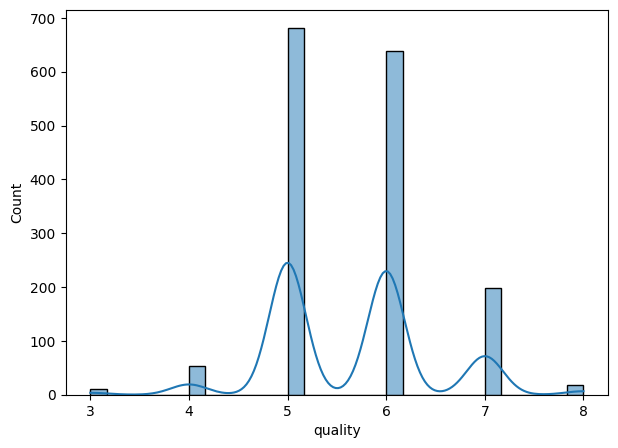

In [166]:
from scipy import stats
#histogram and normal probability plot
print( bos1.columns )
print( stats.skew(bos1) )

sns.histplot(bos1['quality'], kde=True)

## Variale selection (manually)

In [167]:
# variable selection
x = bos1.drop(columns=['quality'])
x = x[['volatile acidity','sulphates','alcohol']]
y = bos1["quality"]
print(x.shape)
print(y.shape)

(1599, 3)
(1599,)


## Train / test split

In [168]:
from sklearn.model_selection import train_test_split
#testing data size is of 25% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=101)
#test = 0.25 random_state = 101

In [169]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [170]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
2.5380535718159316
[-1.24589318  0.65587012  0.32113945]


In [171]:
y_pred = model.predict(x_test)

In [172]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()


,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.45
909,6,6.19


In [173]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print( "RMSE = ", round(math.sqrt(mse),2) )
print( "Average quality =", round(y_test.mean(),2) )

# R^2
print( "R^2 = ", round(model.score(x_test,y_test),2) )

RMSE =  0.72
Average quality = 5.58
R^2 =  0.27


In [174]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.45
909,6,6.19
...,...,...
1528,6,5.86
647,4,5.40
352,5,5.17
116,6,5.48


In [175]:
# สร้าง DataFrame ที่ประกอบด้วยข้อมูล Actual และ Predict
data = pd.DataFrame({
    'Actual': y_test,
    'Predict': y_pred
})

# คำนวณค่าความต่าง (Error) ระหว่าง Actual และ Predict
data['Error'] = data['Actual'] - data['Predict']

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของ Error
mean_error = data['Error'].mean()
std_error = data['Error'].std()

# กำหนดช่วงปกติ (Normal Range) โดยใช้ค่า Mean ± 2 * Std
lower_bound = mean_error - 2 * std_error
upper_bound = mean_error + 2 * std_error

# กรองข้อมูลที่อยู่ในช่วงปกติ
filtered_data = data[(data['Error'] >= lower_bound) & (data['Error'] <= upper_bound)]

# แสดงข้อมูลที่กรองแล้ว (ในช่วงปกติ)
print("ข้อมูลที่อยู่ในช่วงปกติ (ไม่เป็น Outliers):")
print(filtered_data)

# แสดงข้อมูลที่เป็น Outliers (ถูกลบออก)
outliers = data[(data['Error'] < lower_bound) | (data['Error'] > upper_bound)]
print("\nข้อมูลที่เป็น Outliers (ถูกลบออก):")
print(outliers)

ข้อมูลที่อยู่ในช่วงปกติ (ไม่เป็น Outliers):
      Actual  Predict  Error
678        5     5.13  -0.13
1500       5     5.07  -0.07
1457       5     5.20  -0.20
1079       7     6.45   0.55
909        6     6.19  -0.19
...      ...      ...    ...
1528       6     5.86   0.14
647        4     5.40  -1.40
352        5     5.17  -0.17
116        6     5.48   0.52
1001       7     6.04   0.96

[382 rows x 3 columns]

ข้อมูลที่เป็น Outliers (ถูกลบออก):
      Actual  Predict  Error
1276       4     6.26  -2.26
899        3     5.12  -2.12
1429       5     6.55  -1.55
459        3     5.08  -2.08
652        5     7.43  -2.43
1090       8     6.42   1.58
353        5     6.56  -1.56
1120       8     6.54   1.46
1024       7     5.55   1.45
7          7     5.25   1.75
1478       3     5.06  -2.06
1124       4     5.92  -1.92
45         4     6.46  -2.46
876        4     5.83  -1.83
495        8     6.06   1.94
690        3     4.85  -1.85
1449       8     6.19   1.81
1374       3     5.00  -2.

In [176]:
from sklearn.metrics import mean_squared_error, r2_score
# คำนวณ RMSE และ R^2 สำหรับ filtered data
rmse = np.sqrt(mean_squared_error(filtered_data['Actual'], filtered_data['Predict']))
r2 = r2_score(filtered_data['Actual'], filtered_data['Predict'])

# แสดงค่า RMSE และ R^2
print(f"RMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")

RMSE: 0.614
R^2: 0.337


    • Check linearity assumption to target (corr)
    cor_target>0.25

    • Select variables
    volatile acidity, sulphates, alcohol

    • Create model & report equation
    quality = 2.5380535718159316 + -1.24589318 * volatile acidity + 0.65587012 * sulphates + 0.32113945 * alcohol

    • Predict & evaluate RMSE & R2 on test set
    RMSE =  0.72, R^2 =  0.27
    
    • Are there any predicted value out of range?
    Yes, there are 18 predicted value out of range.

    • Improve your model (post-processing)
    remove outliner using Mean ± 2 * Std.

    • Re-evaluate RMSE & on R-square on test set
    RMSE: 0.614, R^2: 0.337

